In [ ]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
 'machine-learning-databases'
 '/breast-cancer-wisconsin/wdbc.data',
 header=None)

In [ ]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [ ]:
le.transform(["B", "M"])

array([0, 1])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    stratify=y,
                                                    random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
test_acc.round(3)

0.956

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
  pipe_lr.fit(X_train[train], y_train[train])
  score = pipe_lr.score(X_train[test], y_train[test])
  scores.append(score)
  print(f"Fold: {k+1:02d},"
        f"Class distr.: {np.bincount(y_train[train])},"
        f"Acc.: {score:.3f}")

Fold: 01,Class distr.: [256 153],Acc.: 0.935
Fold: 02,Class distr.: [256 153],Acc.: 0.935
Fold: 03,Class distr.: [256 153],Acc.: 0.957
Fold: 04,Class distr.: [256 153],Acc.: 0.957
Fold: 05,Class distr.: [256 153],Acc.: 0.935
Fold: 06,Class distr.: [257 153],Acc.: 0.956
Fold: 07,Class distr.: [257 153],Acc.: 0.978
Fold: 08,Class distr.: [257 153],Acc.: 0.933
Fold: 09,Class distr.: [257 153],Acc.: 0.956
Fold: 10,Class distr.: [257 153],Acc.: 0.956


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print(f"CV accuracy scores: {scores}")
print(f"CV accuracy: {np.mean(scores):.3f}")

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV accuracy: 0.950


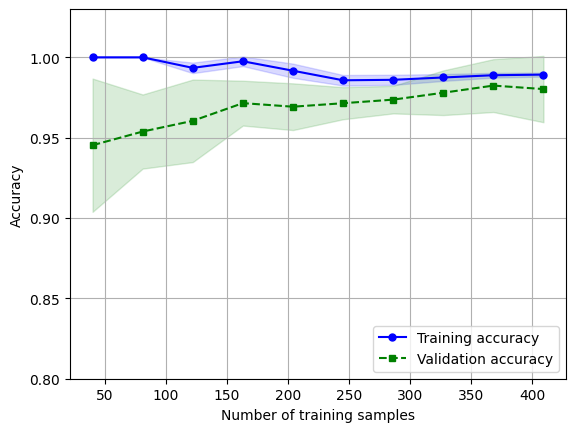

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty="l2",
                                            max_iter=10000))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(.1, 1., 10),
                                                        cv=10,
                                                        n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color="blue", marker="o",
         markersize=5, label="Training accuracy")
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=.15, color="blue")
plt.plot(train_sizes, test_mean,
         color="green", linestyle="--",
         marker="s", markersize=5,
         label="Validation accuracy")
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=.15, color="green")
plt.grid()
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim([.8, 1.03])
plt.show()

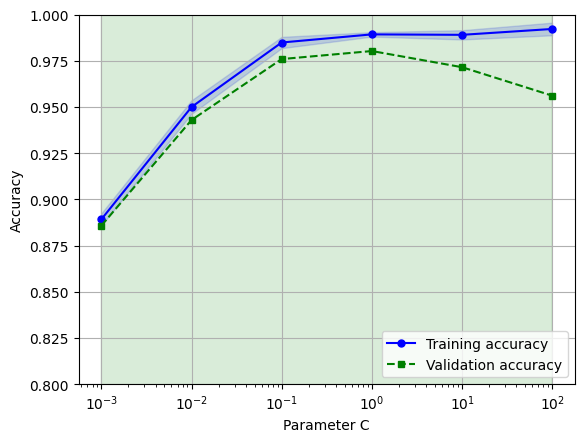

In [ ]:
from sklearn.model_selection import validation_curve

param_range = [.001, .01, .1, 1., 10., 100.]
train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                             X=X_train,
                                             y=y_train,
                                             param_name="logisticregression__C",
                                             param_range=param_range,
                                             cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.mean(test_scores, axis=1)
plt.plot(param_range, train_mean,
         color="blue", marker="o",
         markersize=5, label="Training accuracy")
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=.15,
                 color="blue")
plt.plot(param_range, test_mean,
         color="green", linestyle="--",
         marker="s", markersize=5,
         label="Validation accuracy")
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=.15, color="green")
plt.grid()
plt.xscale("log")
plt.legend(loc="lower right")
plt.xlabel("Parameter C")
plt.ylabel("Accuracy")
plt.ylim([.8, 1.])
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1,
               1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  refit=True,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [ ]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9736842105263158

In [ ]:
param_range = [.0001, .001, .01, .1,
               1., 10., 100., 1000.]


import scipy

param_range = scipy.stats.loguniform(.0001, 1000.)

In [ ]:
np.random.seed(1)
param_range.rvs(10)

array([8.30145146e-02, 1.10222804e+01, 1.00184520e-04, 1.30715777e-02,
       1.06485687e-03, 4.42965766e-04, 2.01289666e-03, 2.62376594e-02,
       5.98924832e-02, 5.91176467e-01])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

pipe_scv = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

In [ ]:
param_grid = [{"svc__C": param_range,
               "svc__kernel": ["linear"]},
              {"svc__C": param_range,
               "svc__gamma": param_range,
               "svc__kernel": ["rbf"]}]
rs = RandomizedSearchCV(estimator=pipe_svc,
                        param_distributions=param_grid,
                        scoring="accuracy",
                        refit=True,
                        n_iter=20,
                        cv=10,
                        random_state=1,
                        n_jobs=-1)
rs = rs.fit(X_train, y_train)
print(rs.best_score_)
print(rs.best_params_)

0.9780676328502416
{'svc__C': 0.05971247755848464, 'svc__kernel': 'linear'}


In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

hs = HalvingRandomSearchCV(pipe_svc,
                           param_distributions=param_grid,
                           n_candidates='exhaust',
                           resource='n_samples',
                           factor=1.5,
                           random_state=1,
                           n_jobs=-1)

In [ ]:
hs = hs.fit(X_train, y_train)
print(hs.best_score_)
print(hs.best_params_)

0.9617647058823529
{'svc__C': 4.934834261073341, 'svc__kernel': 'linear'}


In [ ]:
clf = hs.best_estimator_
print(f"{clf.score(X_test, y_test):.3f}")

0.982


In [ ]:
param_range = [0.0001, 0.001, 0.01, 0.1,
               1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring="accuracy",
                  cv=2)

In [ ]:
scores = cross_val_score(gs, X_train, y_train,
                         scoring="accuracy", cv=5)
print(f"{np.mean(scores):.3f} +/- {np.std(scores):.3f}")

0.974 +/- 0.015


In [ ]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid=[{"max_depth": [1, 2, 3, 4, 5, 6, 7, None]}],
    scoring="accuracy",
    cv=2
)

scores = cross_val_score(gs, X_train, y_train,
                         scoring="accuracy", cv=5)
print(f"{np.mean(scores):.3f} +/- {np.std(scores):.3f}")

0.934 +/- 0.016


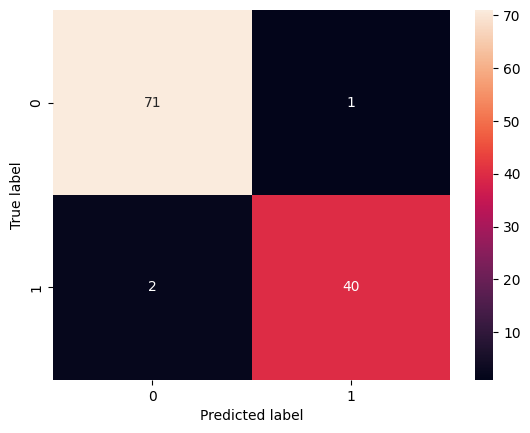

In [ ]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

import seaborn as sns

sns.heatmap(confmat, annot=True)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import matthews_corrcoef

pre_val = precision_score(y_true=y_test, y_pred=y_pred)
print(f"Precision: {pre_val:.3f}")

rec_val = recall_score(y_true=y_test, y_pred=y_pred)
print(f"Recall: {rec_val:.3f}")

f1_val = f1_score(y_true=y_test, y_pred=y_pred)
print(f'F1: {f1_val:.3f}')

mcc_val = matthews_corrcoef(y_true=y_test, y_pred=y_pred)
print(f'MCC: {mcc_val:.3f}')

from sklearn.metrics import make_scorer

c_gamma_range = [0.01, 0.1, 1.0, 10.0]
param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range,
               'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]

scorer = make_scorer(f1_score, pos_label=0)
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Precision: 0.976
Recall: 0.952
F1: 0.964
MCC: 0.943
0.9861994953378878
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


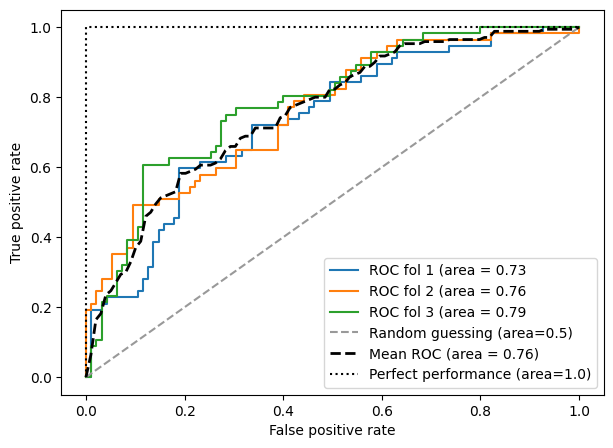

In [ ]:
from sklearn.metrics import roc_curve, auc
from numpy import interp

pipe_lr = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),
    LogisticRegression(penalty="l2", random_state=1,
                        solver="lbfgs", C=100.)
)
X_train2 = X_train[:, [4, 14]]
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))
fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
for i, (train, test) in enumerate(cv):
  probas = pipe_lr.fit(
      X_train2[train],
      y_train[train]
  ).predict_proba(X_train2[test])
  fpr, tpr, thresholds = roc_curve(y_train[test],
                                   probas[:, 1],
                                   pos_label=1)
  mean_tpr += interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = .0
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr,
           tpr,
           label=f"ROC fol {i+1} (area = {roc_auc:.2f}")

plt.plot([0,1],
         [0,1],
         linestyle="--",
         color=(.6, .6, .6),
         label="Random guessing (area=0.5)")
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, "k--",
         label=f"Mean ROC (area = {mean_auc:.2f})", lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=":",
         color="black",
         label="Perfect performance (area=1.0)")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc="lower right")
plt.show()